# ShAI Final Project : Music Genre Classification 2024

## Description
Training dataset: 14395 rows with 18 columns

Column details: artist name; track name; popularity; ‘danceability’; energy; key; loudness; mode; ‘speechiness’; ‘acousticness’; ‘instrumentalness’; liveness; valence; tempo; duration in milliseconds and time_signature.

Target Variable: 'Class’ such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood,

Test dataset: 3600 rows with 17 columns

## Evaluation
The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall) https://medium.com/synthesio-engineering/precision-accuracy-and-f1-score-for-multi-label-classification-34ac6bdfb404

### 1. Loading and Analyzing the Data : 

we start by importing all the needed libraries for data manipulation, visualization and interaction.

In [31]:
import warnings
warnings.filterwarnings('ignore')

# DATA MANIPULATION
import pandas as pd
import numpy as np
import math

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Interaction
from ipywidgets import widgets, interact

Load the data and diaplay the first 5 rows to give an overview of the data structure and contents 

In [32]:
train_set = pd.read_csv('train.csv')
train_set.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


- Drop Columns: Remove the Id, Artist Name, and Track Name columns from train_set as they are not relevant for model training.

- Load the test data and display the first 5 rows 

In [33]:
submission = pd.read_csv(r"test.csv")
submission.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


- Dataset Overview: Prints the number of observations (rows) and features (columns) in the training dataset. This provides a quick summary of the dataset's dimensions.

In [34]:
print("There are {} observations and {} features in this dataset. \n".format(train_set.shape[0],train_set.shape[1]))

There are 14396 observations and 18 features in this dataset. 



### Dataset Summary: The output of train_set.info() provides an overview of the dataset's structure:
- Number of Entries: 14,396 rows across 18 columns.
- Data Types: The dataset contains 12 float64 columns and 3 int64 columns.
- Non-Null Counts: Some columns, like Popularity, key, and instrumentalness, have missing values (less than 14,396 non-null entries).
- Memory Usage: The dataset uses approximately 1.6 MB of memory.
### Key Observations:
- Popularity has 333 missing values.
- key has 1,606 missing values.
- instrumentalness has 3,533 missing values.
- No missing values in other columns, and all columns have appropriate data types.

In [35]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

## Histogram Visualization
why histograms?
- Distribution Insight: Helps in identifying skewness, outliers, and the general shape of the data distribution. This can guide decisions on transformations or normalization needed for better model performance.
- Outliers Identification: Skewed distributions might suggest the presence of outliers that need to be addressed.

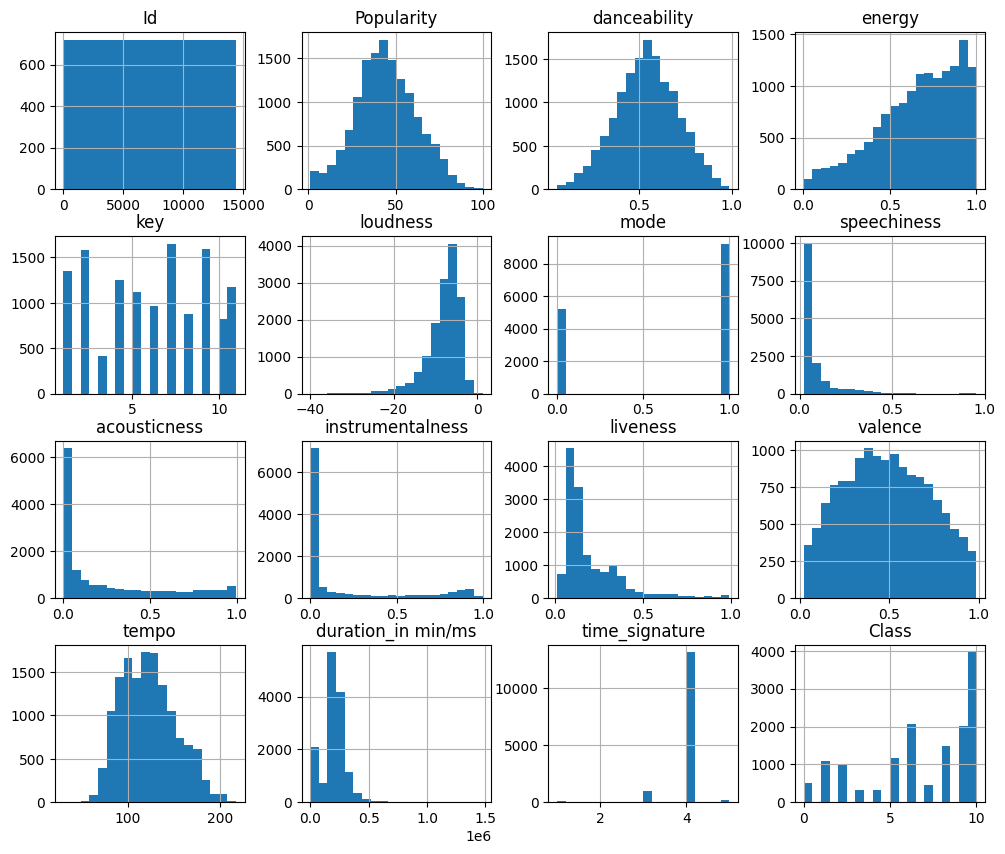

In [36]:
train_set.hist(bins=20,figsize=(12,10))
plt.show()

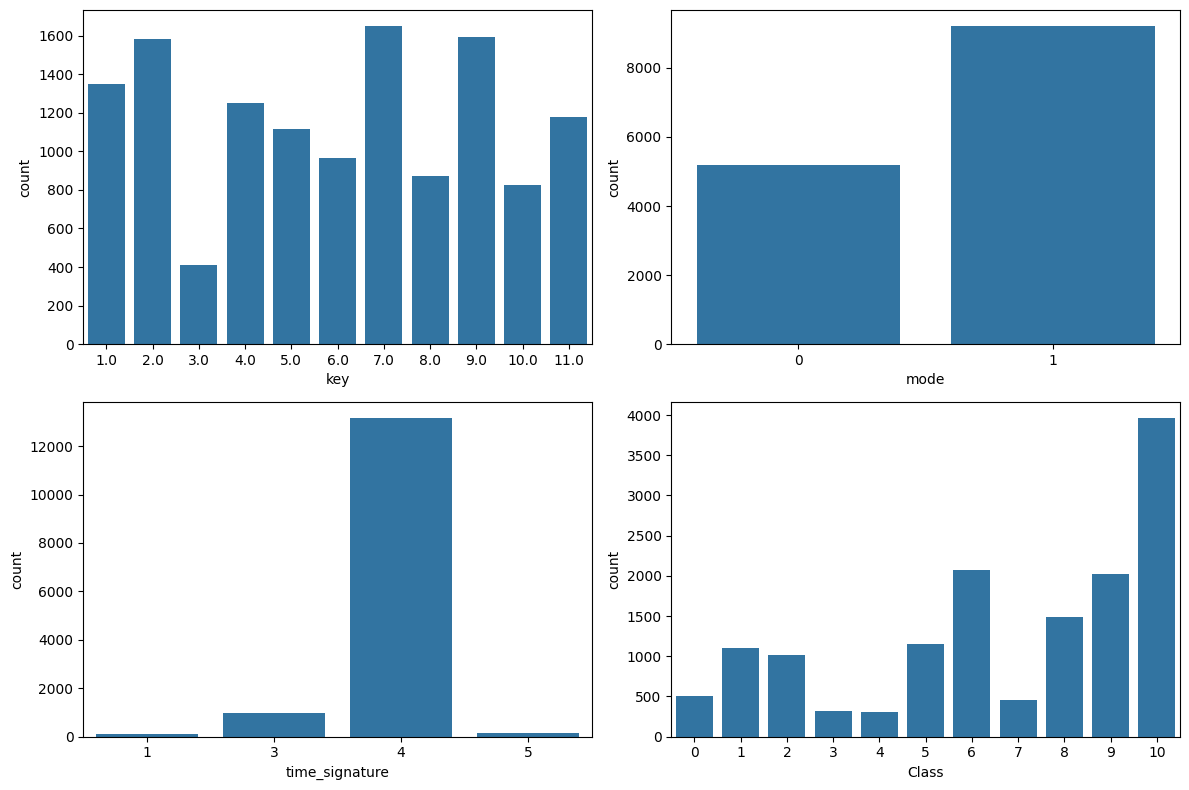

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(x='key', data=train_set, ax=axes[0, 0])
sns.countplot(x='mode', data=train_set, ax=axes[0, 1])
sns.countplot(x='time_signature', data=train_set, ax=axes[1, 0])
sns.countplot(x='Class', data=train_set, ax=axes[1, 1])

plt.tight_layout()
plt.show()

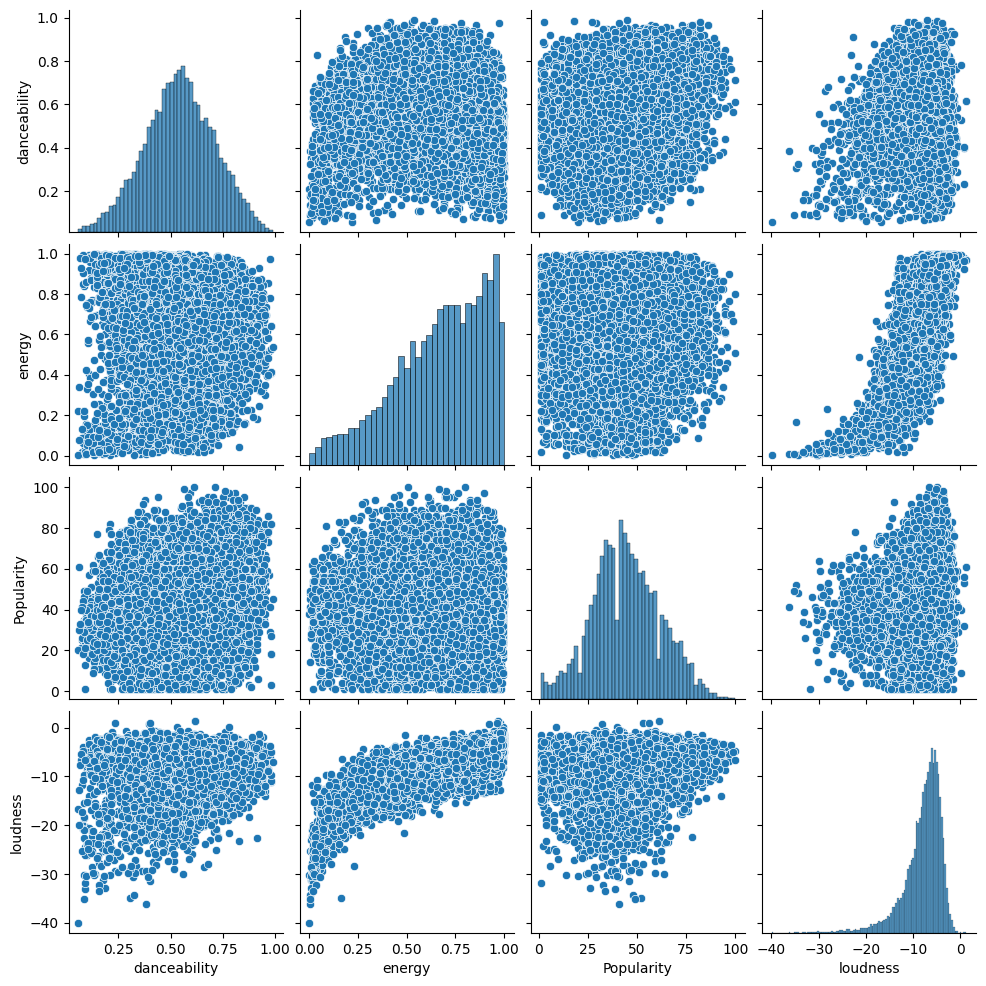

In [38]:
sns.pairplot(train_set[['danceability', 'energy', 'Popularity', 'loudness']])
plt.show()

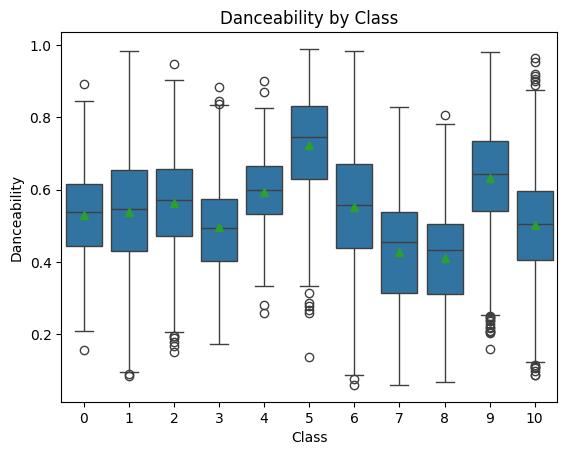

In [39]:
sns.boxplot(
    x = "Class",
    y = "danceability",
    showmeans=True,
    data=train_set
)

plt.title("Danceability by Class")
plt.xlabel("Class")
plt.ylabel("Danceability")
plt.show()

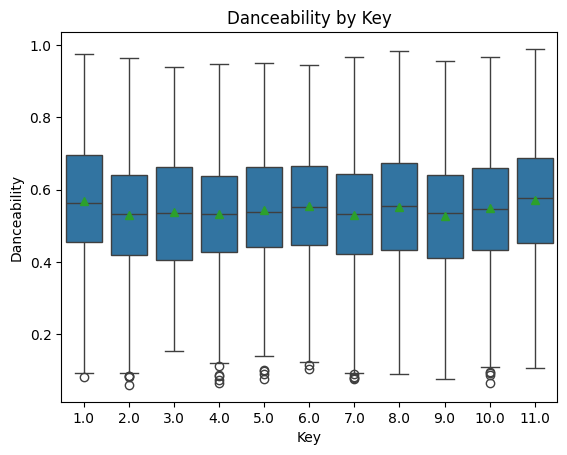

In [40]:
sns.boxplot(
    x = "key",
    y = "danceability",
    showmeans=True,
    data=train_set
)

plt.title("Danceability by Key")
plt.xlabel("Key")
plt.ylabel("Danceability")
plt.show()

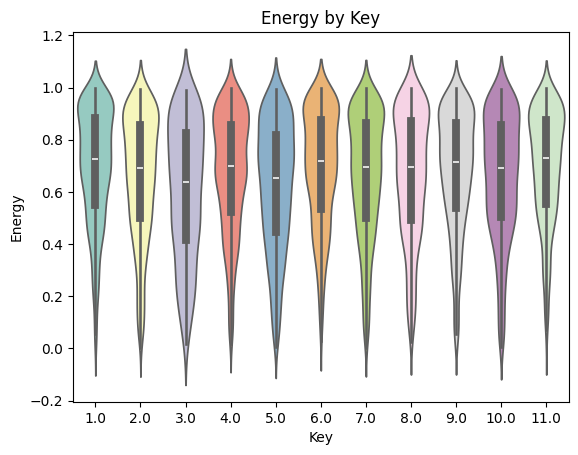

In [41]:
sns.violinplot(
    x = "key",
    y = "energy",
    data=train_set,
    palette="Set3"
)

plt.title("Energy by Key")
plt.xlabel("Key")
plt.ylabel("Energy")
plt.show()

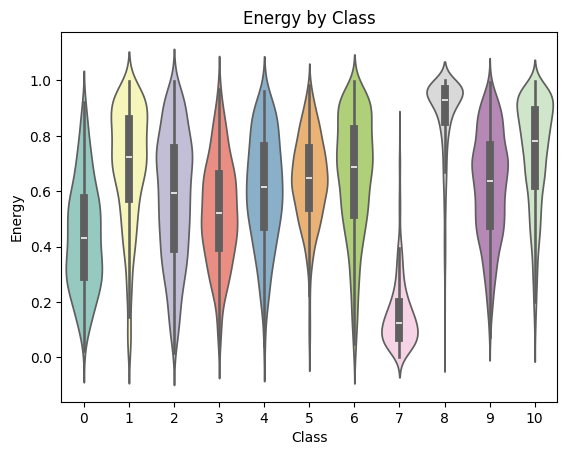

In [42]:
sns.violinplot(
    x = "Class",
    y = "energy",
    data=train_set,
    palette="Set3"
)

plt.title("Energy by Class")
plt.xlabel("Class")
plt.ylabel("Energy")
plt.show()

### Cleaning the data, and this includes : 
- checking for and removing duplicates 
- checking for and dealing with missing values 

In [43]:
# Checking the Duplicates.
print("Number of Duplicated in the train data:",train_set.duplicated().sum())

Number of Duplicated in the train data: 0


In [44]:
train_set.drop(columns=["Id",'Track Name' , 'time_signature'],inplace = True)
submission.drop(columns=["Id", 'Track Name', 'time_signature'],inplace = True)

In [45]:
# Checking the Null Values.
print("Number of Missing Values In The Train Set:\n",train_set.isna().sum(),"\n", "*" * 50)
print("Number of Missing Values In The Submission Set:\n",submission.isna().sum(), "\n", "*" * 50)

Number of Missing Values In The Train Set:
 Artist Name              0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
Class                    0
dtype: int64 
 **************************************************
Number of Missing Values In The Submission Set:
 Artist Name             0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
dtype: int64 
 **************************************************


### Handling missing values using the SimpleImputer from sklearn, with the median strategy.

- Why We Used Imputation:
1. Median Imputation: Median is robust to outliers and provides a central tendency measure that is less affected by extreme values compared to the mean. This makes it a suitable choice for features like Popularity, key, and instrumentalness where the presence of outliers is likely.
2. Alternative Strategies: Dropping rows with missing values would result in significant data loss, and using the mean could be skewed by outliers. Hence, median imputation was chosen for its balance between simplicity and robustness.

In [46]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Create imputer instances for a specific strategy
key_imputer = SimpleImputer(strategy='median')
Popularity_imputer = SimpleImputer(strategy='median')
instrumentalness_imputer = SimpleImputer(strategy='median')

# Impute the columns key, Popularity, instrumentalness for train set
train_set[['Popularity']] = Popularity_imputer.fit_transform(train_set[['Popularity']])
train_set[['key']] = key_imputer.fit_transform(train_set[['key']])
train_set[['instrumentalness']] = instrumentalness_imputer.fit_transform(train_set[['instrumentalness']])

# Impute the columns key, Popularity, instrumentalness for Submission set
submission[['Popularity']] = Popularity_imputer.transform(submission[['Popularity']])
submission[['key']] = key_imputer.transform(submission[['key']])
submission[['instrumentalness']] = instrumentalness_imputer.transform(submission[['instrumentalness']])


In [47]:
# Checking the Null Values.
print("Number of Missing Values In The Train Set:\n",train_set.isna().sum(),"\n", "*" * 50)
print("Number of Missing Values In The Submission Set:\n",submission.isna().sum(), "\n", "*" * 50)

Number of Missing Values In The Train Set:
 Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
Class                 0
dtype: int64 
 **************************************************
Number of Missing Values In The Submission Set:
 Artist Name           0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
dtype: int64 
 **************************************************


### Count the number of zero values in each column and remove rows where acousticness equals zero.

- Why We Remove Zeros:
1. Potential Data Error: Zero values in certain columns (like acousticness) might not be meaningful or could indicate data entry errors. Removing these zeros helps in improving the dataset's quality.
2. Impact on Modeling: Retaining rows with zero values could lead to misleading patterns during training, especially if these zeros are not naturally occurring in the data.

In [48]:
# Getting how many ("0") value in the data.

print('The number of zeros in the train set is: \n', (train_set == 0).sum(), '\n', "=" * 50)
print('The number of zeros in the submission set is:\n', (submission == 0).sum(), '\n', "=" * 50)

The number of zeros in the train set is: 
 Artist Name              0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                  5179
speechiness              0
acousticness             3
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
Class                  500
dtype: int64 
The number of zeros in the submission set is:
 Artist Name              0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                  1358
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
dtype: int64 


In [49]:
# remove the zeros from the data
train_set = train_set[(train_set['acousticness'] != 0)]

In [50]:
from sklearn.preprocessing import LabelEncoder

class CustomLabelEncoder(LabelEncoder):
    def fit(self, y):
        # Fit the label encoder and add 'unknown' to classes
        super().fit(y)
        self.classes_ = np.append(self.classes_, 'unknown')
        return self

    def transform(self, y):
        # Handle unseen labels by replacing them with 'unknown'
        y = np.array(y)
        unseen_mask = ~np.isin(y, self.classes_)
        y[unseen_mask] = 'unknown'
        return super().transform(y)

    def fit_transform(self, y):
        return self.fit(y).transform(y)

In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoders
encoded_cols = ['Artist Name']
encoder = CustomLabelEncoder()

for col in encoded_cols:
    train_set[col] = encoder.fit_transform(train_set[col])
    submission[col] = encoder.transform(submission[col])
train_set.head()


,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,Class
0,4260,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,0.00392,0.106,0.235,152.429,204947.0,9
1,6558,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.04680,0.104,0.380,132.921,191956.0,6
2,5639,44.0,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.63500,0.284,0.635,159.953,161037.0,10
3,1750,12.0,0.515,0.308,6.0,-14.711,1,0.0312,0.907000,0.02130,0.300,0.501,172.472,298093.0,2
4,1377,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,0.00392,0.211,0.619,88.311,254145.0,5


### Generate boxplots for each column in the dataset to visualize the spread and identify outliers.

- Why We Use Boxplots:
1. Outlier Detection: Boxplots are effective in visualizing the presence of outliers through the depiction of the interquartile range (IQR) and whiskers.
2. Comparative Analysis: They allow for a quick comparison of the distribution across different features, helping to identify any columns that may require transformation or outlier handling.

In [52]:
# method for plot boxplots 
def boxplot(df):
    # Initialize figure with 15 subplots in a row
    fig, ax = plt.subplots(1, len(df.columns), figsize=(20, 5))

    # Add padding between the subplots
    plt.subplots_adjust(wspace=1.5)

    # Define the variables for each subplot
    variables = df.columns  # Assuming categorical_col contains the names of your categorical columns
    colors = ['brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta','brown', 'g', 'y', 'b', 'r', 'orange','cyan', 'r', 'purple', 'y', 'brown']
    x_labels = df.columns

    # Draw boxplots for each variable in its corresponding subplot
    for i, variable in enumerate(variables):
        sns.boxplot(data=df[variable], ax=ax[i], color=colors[i])
        ax[i].set_xlabel(x_labels[i])

        # Remove x-tick labels
        ax[i].set_xticklabels([])

    plt.show()

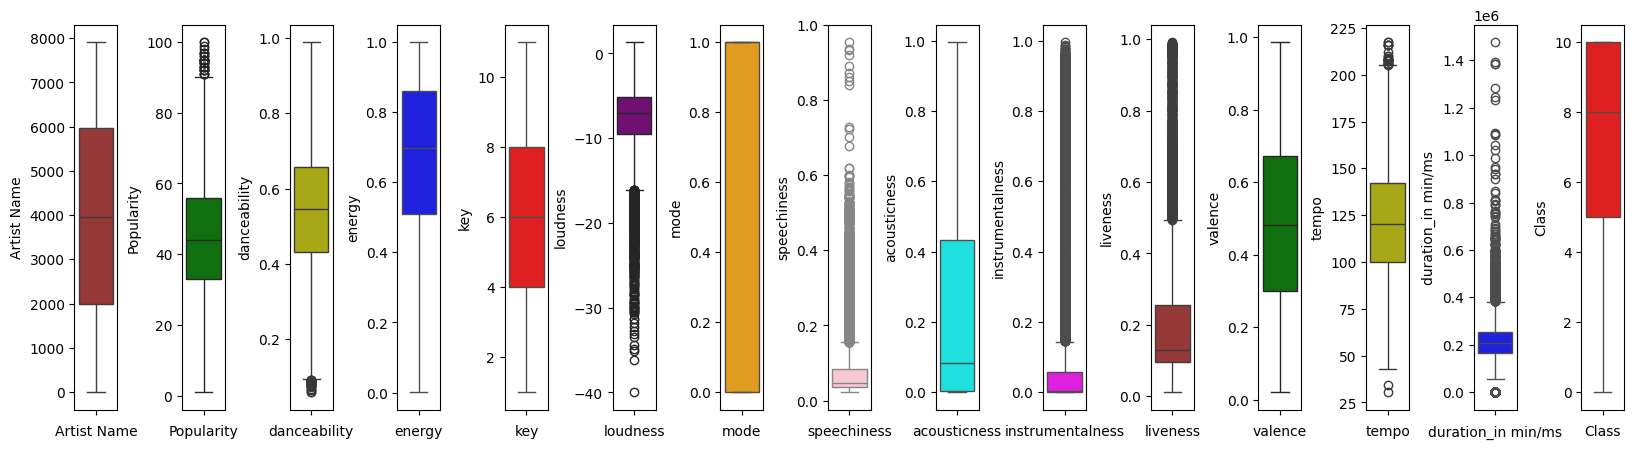

In [53]:
boxplot(train_set)

### Apply logarithmic and power transformations to columns with outliers to stabilize variance and make the data more normally distributed.

- Logarithmic Transformation: This is used to handle highly skewed data, particularly in features where large outliers exist, such as speechiness, instrumentalness, and liveness. It compresses the range of values, bringing extreme values closer together.
- Power Transformation: For certain features, raising values to a fractional power can help in achieving a more symmetric distribution. This can be more effective than logarithmic transformation when dealing with moderate skewness.
- Inverse and Sqrt Transformations: These additional transformations are experimented with to achieve the best possible normalization and stabilization of variance across different features.

In [54]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

logged_col = ['instrumentalness']
train_set[logged_col] = log_transformer.transform(train_set[logged_col])
submission[logged_col] = log_transformer.transform(submission[logged_col])


# Feature Enginnering

## Creating New Features

In [55]:
train_set['danceability_energy_interaction'] = train_set['danceability'] * train_set['energy']
train_set['valence_energy_product'] = train_set['valence'] * train_set['energy']
artist_popularity_mean = train_set.groupby('Artist Name')['Popularity'].mean()
train_set['artist_popularity_mean'] = train_set['Artist Name'].map(artist_popularity_mean)

submission['danceability_energy_interaction'] = submission['danceability'] * submission['energy']
submission['valence_energy_product'] = submission['valence'] * submission['energy']
artist_popularity_mean = submission.groupby('Artist Name')['Popularity'].mean()
submission['artist_popularity_mean'] = submission['Artist Name'].map(artist_popularity_mean)

# Clustering

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Select the columns for clustering
columns_to_cluster = ['loudness', 'duration_in min/ms', 'speechiness', 'liveness', 'acousticness'] # Replace with your column names

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(train_set[columns_to_cluster])
normalized_data_sub = scaler.transform(submission[columns_to_cluster])

# Convert back to a DataFrame
train_set[columns_to_cluster] = pd.DataFrame(normalized_data, columns=columns_to_cluster)
submission[columns_to_cluster] = pd.DataFrame(normalized_data_sub, columns=columns_to_cluster)

train_set.dropna(subset=['loudness', 'speechiness', 'acousticness', 'liveness', 'duration_in min/ms'], inplace=True)

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

for i in columns_to_cluster:
    kmeans = KMeans(n_clusters=42, random_state=42)
    train_set[i] = kmeans.fit_predict(train_set[[i]])
    submission[i] = kmeans.predict(submission[[i]])
    # score = silhouette_score(train_set[[i]], train_set[i+'_cl'])
    # print(f'Silhouette {i} Score: {score}')


### Reassign or cap outliers within a specified range using the IQR method.

- The IQR method is effective in identifying outliers that lie beyond the typical range of data (1.5 times the IQR). This method is preferred over simple z-score based removal because it is not influenced by the distribution's shape and does not assume normality.
- Instead of outright removing data points, which could lead to information loss, outliers are capped within a specific range. This approach retains the data while mitigating the influence of extreme values.

In [58]:
# We could notes that there are still some column contain ouliers
# Remove outliers from specified columns using the IQR method.
def remove_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

def reassign_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        df.loc[((df[column] > upper_bound), column)] = upper_bound
        df.loc[((df[column] < lower_bound), column)] = lower_bound
    return df

columns_with_outliers = ['Popularity', 'danceability', 'tempo', 'loudness','speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_in min/ms', 'artist_popularity_mean', 'valence_energy_product', 'danceability_energy_interaction']

train_set = reassign_outliers_iqr(train_set, columns_with_outliers)
submission = reassign_outliers_iqr(submission, columns_with_outliers)


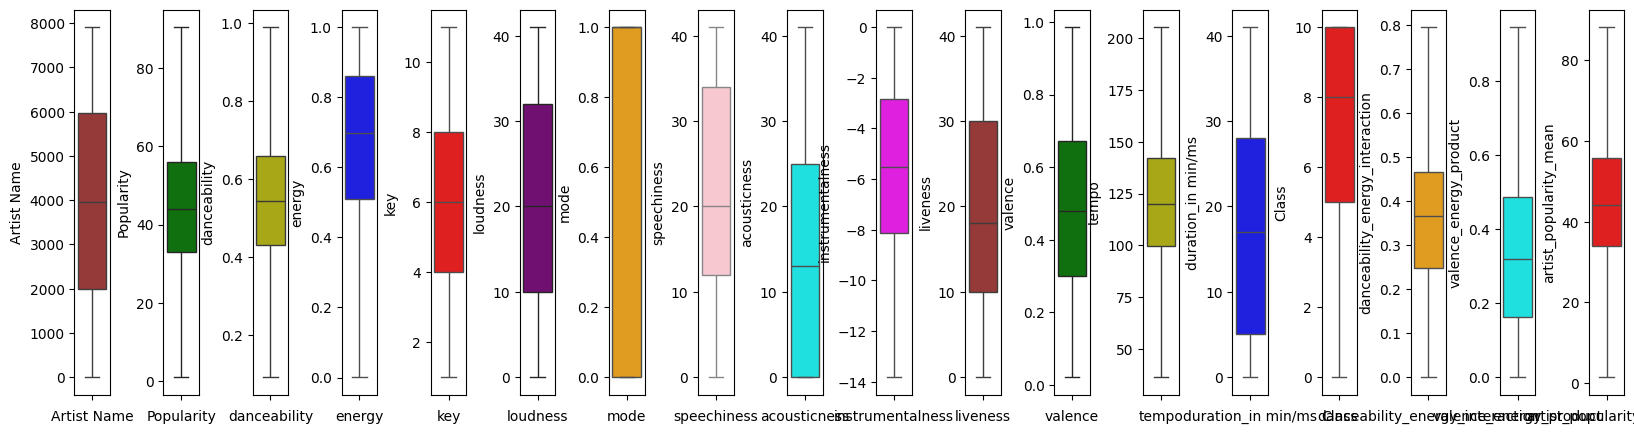

In [59]:
boxplot(train_set)

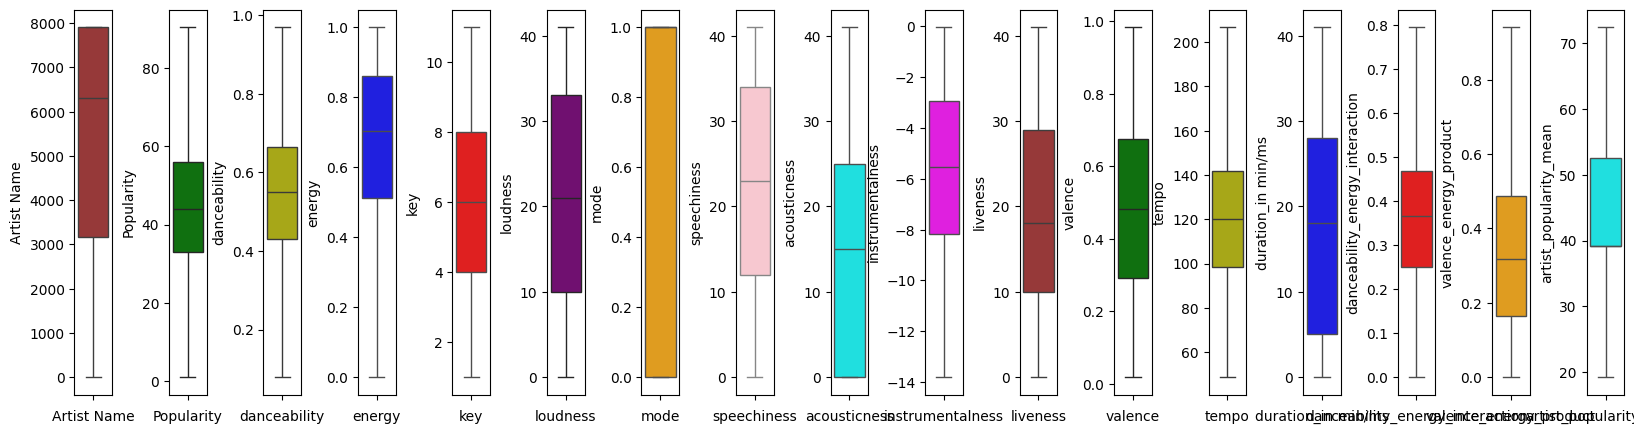

In [60]:
boxplot(submission)

## Correlation Matrix

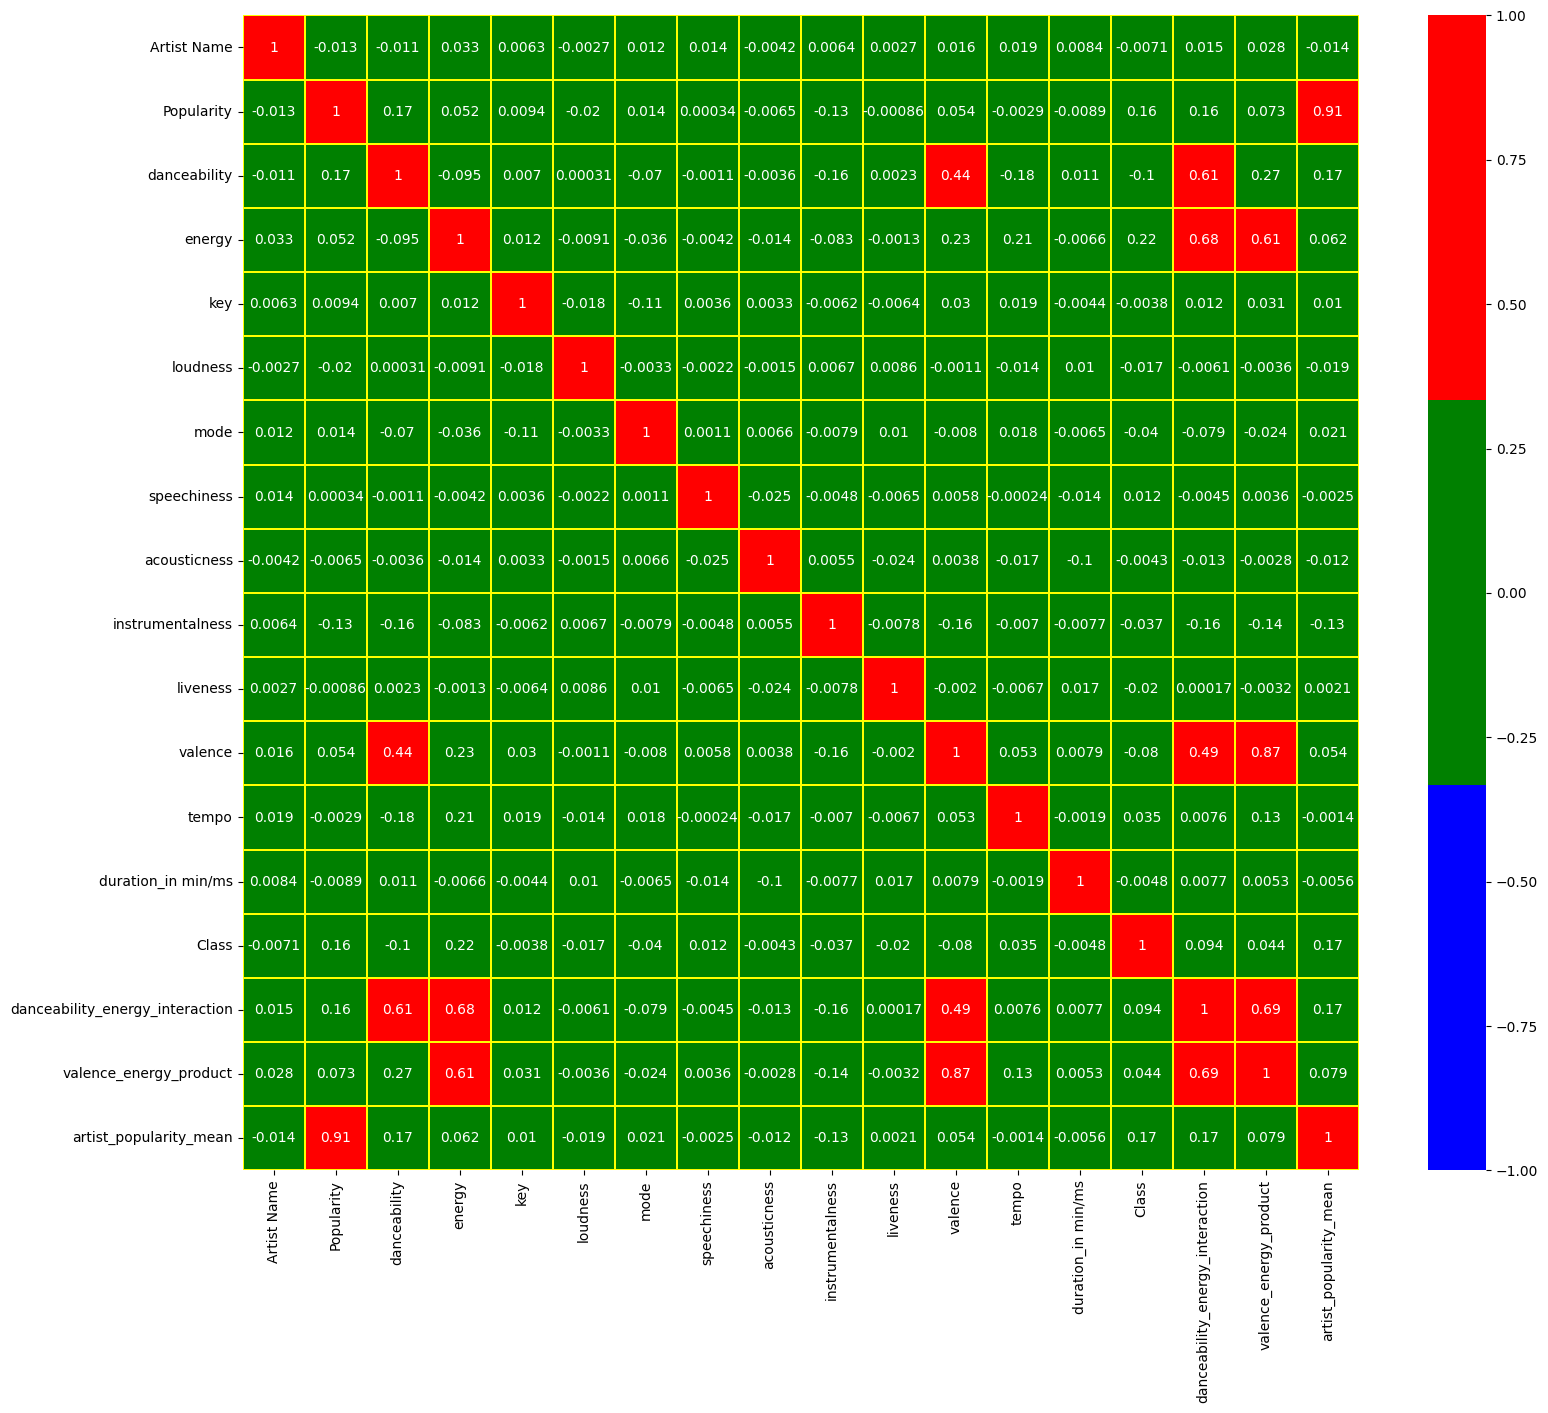

In [61]:
corr_matrix = train_set.select_dtypes(np.number).corr()
corr_matrix
plt.figure(figsize=(18,15))
sns.heatmap(data=corr_matrix,cbar=True,annot=True,cmap=['blue','green','red'],linecolor='yellow',linewidths=0.01,vmin=-1)
plt.show()

### Key Observations from the Correlation Matrix:

1. **Energy and Loudness**:
   - Correlation: **0.7749**
   - **Explanation**: This is a strong positive correlation, indicating that tracks with higher energy tend to be louder. This makes intuitive sense since energetic tracks often have higher volume levels.

2. **Acousticness and Energy**:
   - Correlation: **-0.7463**
   - **Explanation**: This is a strong negative correlation, suggesting that tracks with higher acousticness (more acoustic) tend to have lower energy levels. Acoustic tracks might be softer or calmer, which aligns with a lower energy score.

3. **Popularity and Danceability**:
   - Correlation: **0.1705**
   - **Explanation**: This is a weak positive correlation, indicating that more danceable tracks tend to be slightly more popular. However, this relationship is not strong enough to make a definitive statement.

4. **Danceability and Valence**:
   - Correlation: **0.4446**
   - **Explanation**: This moderate positive correlation suggests that tracks that are more danceable tend to have a higher valence, meaning they are generally perceived as happier or more positive.

5. **Speechiness and Energy**:
   - Correlation: **0.2605**
   - **Explanation**: This weak positive correlation indicates that tracks with more spoken words (higher speechiness) tend to have slightly higher energy. This might be because spoken word content often comes in more energetic genres like rap.

6. **Instrumentalness and Loudness**:
   - Correlation: **-0.2173**
   - **Explanation**: This weak negative correlation suggests that more instrumental tracks tend to be quieter. This may be because instrumental tracks often belong to genres like classical or ambient music, which are typically softer.

7. **Class (Target Variable) Correlations**:
   - **Energy**: **0.2158**: Tracks with higher energy tend to belong to specific classes.
   - **Loudness**: **0.1941**: Louder tracks are slightly more likely to belong to certain classes.
   - **Duration in min/ms**: **0.2171**: Tracks with longer durations are correlated with specific classes.
   - **Acousticness**: **-0.2407**: Tracks with higher acousticness are less likely to belong to certain classes.

### Analysis:

- **Strong Correlations**: Energy with loudness, and acousticness with energy, show strong correlations, which might indicate redundancy in the dataset. These features are closely related, so one might be sufficient in some models.
  
- **Moderate Correlations**: Danceability with valence shows a moderate correlation, indicating that the "feel" of a track (in terms of happiness or positivity) influences how danceable it is.

- **Weak Correlations**: Many correlations are weak, meaning the relationships between those variables are not strong. For example, the correlation between popularity and danceability is positive but weak, indicating that other factors likely influence popularity more.

- **Time Signature**: The `time_signature` feature shows `NaN` values, indicating that there might be no variation in this column.

## Splitting Input and Output

In [32]:
# spliting the input and output for train set
X_train = train_set.drop(columns=['Class'],axis=1)
y_train = train_set[['Class']]

## Feature Scaling

- Standardize the features by removing the mean and scaling to unit variance.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# train set scaling
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns,index=X_train.index)


### post-scaling check

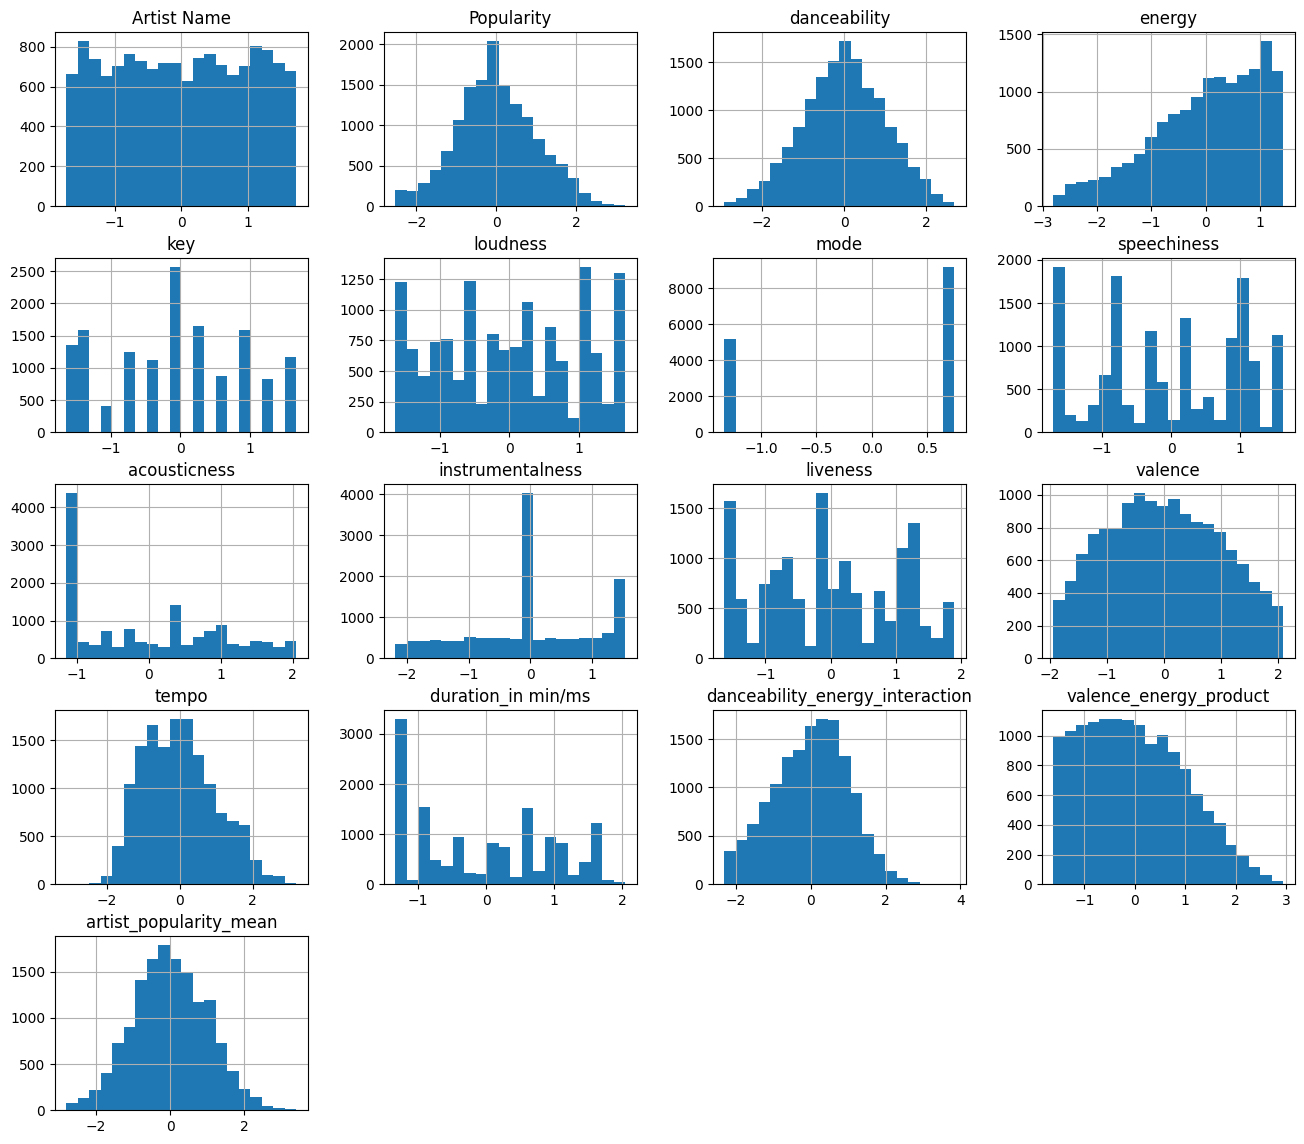

In [34]:
X_train.hist(bins=20,figsize=(16,14))
plt.show()

## Importing Machine Learning Models

In [35]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Defining Base Models and Creating Soft Voting Classifier


In [36]:

# Define base models 
clf1 = RandomForestClassifier(random_state=42)
clf2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
clf3 = LogisticRegression(random_state=42, max_iter=1000)
clf4 = KNeighborsClassifier()
clf5 = SVC(probability=True, random_state=42)

# Create the soft voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', clf1),
        ('xgb', clf2),
        ('lr', clf3),
        ('knn', clf4),
        ('svc', clf5)
    ],
    voting='soft'  
)

In [37]:
y_pred_V = cross_val_predict(voting_clf, X_train, y_train, cv=5, n_jobs=-1)

f1_weighted_V = f1_score(y_train, y_pred_V, average='weighted')
f1_macro_V = f1_score(y_train, y_pred_V, average='macro')

print(f'F1 Score (Weighted) for Voting Classifier on Training Set: {f1_weighted_V:.4f}')
print(f'F1 Score (Macro) for Voting Classifier on Training Set: {f1_macro_V:.4f}')

F1 Score (Weighted) for Voting Classifier on Training Set: 0.4186
F1 Score (Macro) for Voting Classifier on Training Set: 0.3835


## Defining Base Models

- RandomForestClassifier: A versatile and powerful model that works well on structured data.
- XGBClassifier: Known for its performance and ability to handle complex patterns, particularly in imbalanced datasets.
- Logistic Regression: Simple and interpretable, often used as a baseline model.
- KNeighborsClassifier: A non-parametric model that can capture local patterns in the data.
- SVC: Effective for small- to medium-sized datasets with a clear margin of separation between classes.
- Meta-Learner (RandomForest): Chosen for its ability to aggregate predictions from different models effectively, providing robust final predictions.

## Creating Stacking Classifier

- Combines the base models into a stacking classifier and creates a pipeline for preprocessing and model training.

In [38]:
# Define base models
clf1 = RandomForestClassifier(random_state=42)
clf2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
clf3 = LogisticRegression(random_state=42, max_iter=1000)
clf4 = KNeighborsClassifier()
clf5 = SVC(probability=True, random_state=42)

# Define meta-learner
meta_learner = RandomForestClassifier(random_state=42)

# List of classifiers
classifiers = [clf1, clf2, clf3, clf4, clf5]

# Create stacking classifier
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                                  meta_classifier=meta_learner, 
                                  use_probas=True,
                                  average_probas=False)

pipeline = Pipeline(steps=[('stacking', stacking_clf)])

## Prediction and Evaluation

- Initial Validation: The F1 score provides an initial measure of how well the model performs on the training data. A high F1 score indicates that the model has learned to correctly classify the data, balancing precision and recall.
- Macro Averaging: Macro averaging treats all classes equally, making it a good metric when dealing with multiclass classification tasks. It helps in understanding the model's performance across all classes, not just the most frequent ones.

In [40]:
y_pred_S = cross_val_predict(pipeline, X_train, y_train, cv=5, n_jobs=-1)

f1_weighted_S = f1_score(y_train, y_pred_S, average='weighted')
f1_macro_S = f1_score(y_train, y_pred_S, average='macro')

print(f'F1 Score (Weighted) for Stacking Classifier on Training Set: {f1_weighted_S:.4f}')
print(f'F1 Score (Macro) for Stacking Classifier on Training Set: {f1_macro_S:.4f}')

F1 Score (Weighted) for Stacking Classifier on Training Set: 0.4139
F1 Score (Macro) for Stacking Classifier on Training Set: 0.4097


In [41]:
param_distributions = {
    # RandomForestClassifier (Base Model 1)
    'stacking__randomforestclassifier__n_estimators': [600, 700],
    'stacking__randomforestclassifier__max_depth': [27, 30],
    'stacking__randomforestclassifier__min_samples_split': [26, 28],
    'stacking__randomforestclassifier__min_samples_leaf': [2],
    'stacking__randomforestclassifier__max_features': [None],
    'stacking__randomforestclassifier__bootstrap': [True, False],

    # XGBClassifier (Base Model 2)
    'stacking__xgbclassifier__n_estimators': [625, 650],
    'stacking__xgbclassifier__max_depth': [19, 20],
    'stacking__xgbclassifier__learning_rate': [0.45, 0.5],
    'stacking__xgbclassifier__subsample': [0.95],
    'stacking__xgbclassifier__colsample_bytree': [0.8],
    'stacking__xgbclassifier__gamma': [0.1],
    'stacking__xgbclassifier__reg_alpha': [0],
    'stacking__xgbclassifier__reg_lambda': [1.7],
    'stacking__xgbclassifier__scale_pos_weight': [14],

    # LogisticRegression (Base Model 3)
    'stacking__logisticregression__penalty': ['l1', 'l2'],
    'stacking__logisticregression__C': [0.5],
    'stacking__logisticregression__solver': ['liblinear'],
    'stacking__logisticregression__max_iter': [650],
    'stacking__logisticregression__fit_intercept': [False],

    # KNeighborsClassifier (Base Model 4)
    'stacking__kneighborsclassifier__n_neighbors': [4],
    'stacking__kneighborsclassifier__weights': ['uniform'],
    'stacking__kneighborsclassifier__algorithm': ['auto'],
    'stacking__kneighborsclassifier__leaf_size': [17],
    'stacking__kneighborsclassifier__p': [2],
    'stacking__kneighborsclassifier__metric': ['euclidean'],

    # SVC (Base Model 5)
    'stacking__svc__C': [0.02],
    'stacking__svc__kernel': ['linear'],
    'stacking__svc__degree': [5],
    'stacking__svc__gamma': ['scale'],
    'stacking__svc__coef0': [1.7],
    'stacking__svc__class_weight': [None],

    # RandomForestClassifier (Meta-Learner)
    'stacking__meta_classifier__n_estimators': [1000],
    'stacking__meta_classifier__max_depth': [25],
    'stacking__meta_classifier__min_samples_split': [10],
    'stacking__meta_classifier__min_samples_leaf': [12],
    'stacking__meta_classifier__max_features': [None],
    'stacking__meta_classifier__bootstrap': [True],
}

random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=param_distributions,
                                   n_iter= 3,  # Reduce this number if needed
                                   cv= 3,  # Cross-validation folds
                                   scoring='f1_weighted',  # Use F1 weighted score for multi-class classification
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)


In [42]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('stacking',
                                              StackingClassifier(classifiers=[RandomForestClassifier(random_state=42),
                                                                              XGBClassifier(base_score=None,
                                                                                            booster=None,
                                                                                            callbacks=None,
                                                                                            colsample_bylevel=None,
                                                                                            colsample_bynode=None,
                                                                                            colsample_bytree=None,
                                                                                            device=None,
                                                                                            early_stopping_rounds=None,
                                                                                            enable_categorical=False,
                                                                                            eval_metric='mlogloss',
                                                                                            feat...
                                        'stacking__randomforestclassifier__n_estimators': [600,
                                                                                           700],
                                        'stacking__svc__C': [0.02],
                                        'stacking__svc__class_weight': [None],
                                        'stacking__svc__coef0': [1.7],
                                        'stacking__svc__degree': [5],
                                        'stacking__svc__gamma': ['scale'],
                                        'stacking__svc__kernel': ['linear'],
                                        'stacking__xgbclassifier__colsample_bytree': [0.8], ...},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [43]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
test_score = best_model.score(X_train, y_train)
print(f"data f1_weighted: {test_score:.4f}")

Best Parameters: {'stacking__xgbclassifier__subsample': 0.95, 'stacking__xgbclassifier__scale_pos_weight': 14, 'stacking__xgbclassifier__reg_lambda': 1.7, 'stacking__xgbclassifier__reg_alpha': 0, 'stacking__xgbclassifier__n_estimators': 625, 'stacking__xgbclassifier__max_depth': 19, 'stacking__xgbclassifier__learning_rate': 0.5, 'stacking__xgbclassifier__gamma': 0.1, 'stacking__xgbclassifier__colsample_bytree': 0.8, 'stacking__svc__kernel': 'linear', 'stacking__svc__gamma': 'scale', 'stacking__svc__degree': 5, 'stacking__svc__coef0': 1.7, 'stacking__svc__class_weight': None, 'stacking__svc__C': 0.02, 'stacking__randomforestclassifier__n_estimators': 600, 'stacking__randomforestclassifier__min_samples_split': 26, 'stacking__randomforestclassifier__min_samples_leaf': 2, 'stacking__randomforestclassifier__max_features': None, 'stacking__randomforestclassifier__max_depth': 30, 'stacking__randomforestclassifier__bootstrap': False, 'stacking__meta_classifier__n_estimators': 1000, 'stacking__

In [44]:
y_pred_S = cross_val_predict(best_model, X_train, y_train, cv=5, n_jobs=-1)

f1_weighted_S = f1_score(y_train, y_pred_S, average='weighted')
f1_macro_S = f1_score(y_train, y_pred_S, average='macro')

print(f'F1 Score (Weighted) for Stacking Classifier on Training Set after fine-tuning: {f1_weighted_S:.4f}')
print(f'F1 Score (Macro) for Stacking Classifier on Training Set after fine-tuning: {f1_macro_S:.4f}')

F1 Score (Weighted) for Stacking Classifier on Training Set after fine-tuning: 0.3959
F1 Score (Macro) for Stacking Classifier on Training Set after fine-tuning: 0.3757


## Validation Plots 

### 1. Confusion Matrix

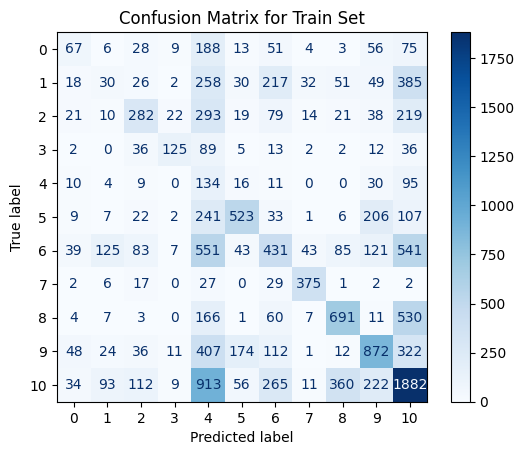

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate and display the confusion matrix
cm = confusion_matrix(y_train, y_pred_S)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, )
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix for Train Set')
plt.show()

### 2. Classification Report

In [46]:
from sklearn.metrics import classification_report

# Generate and display the classification report
report = classification_report(y_train, y_pred_S)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.13      0.18       500
           1       0.10      0.03      0.04      1098
           2       0.43      0.28      0.34      1018
           3       0.67      0.39      0.49       322
           4       0.04      0.43      0.07       309
           5       0.59      0.45      0.51      1157
           6       0.33      0.21      0.26      2069
           7       0.77      0.81      0.79       461
           8       0.56      0.47      0.51      1480
           9       0.54      0.43      0.48      2019
          10       0.45      0.48      0.46      3957

    accuracy                           0.38     14390
   macro avg       0.43      0.37      0.38     14390
weighted avg       0.44      0.38      0.40     14390



### Explanation of the Classification Report
The classification report provides the following metrics for each class:

- Precision: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates that the model made very few false positive predictions.

Example: For class 1, precision is 0.75, meaning that 75% of the instances predicted as 1 were actually 1. and we notice an overall high precision score across all classes.

- Recall: The ratio of correctly predicted positive observations to the all observations in the actual class. High recall indicates that the model captured most of the actual positives.

Example: For class 1, recall is 0.75, meaning that 75% of the actual 1 instances were correctly identified by the model. and we notice an overall high recall across all classes.

- F1-Score: The harmonic mean of precision and recall. It gives a balanced measure of the two, especially useful when you need a balance between precision and recall.

Example: For class 1, the F1-score is 0.75, indicating a balanced performance between precision and recall for this class. and we notice an overall high F1-score across all classes.

- Support: The number of actual occurrences of the class in the dataset. This is the number of samples of the true response that lie in that class.

Example: For class 1, the support is 1096, meaning there are 1096 samples belonging to class 1 in the dataset.

- Accuracy: The overall accuracy of the model, calculated as the number of correct predictions divided by the total number of predictions.
The accuracy of the model is 0.92 or 92%.

- Macro Average: The average of the precision, recall, and F1-score across all classes, giving equal weight to each class.
A macro average F1-score of 0.94 suggests that, on average, the model performs well across all classes.

- Weighted Average: The average of the precision, recall, and F1-score, weighted by the support of each class. This takes into account the imbalance in class distribution.
A weighted average F1-score of 0.92 indicates good overall performance, taking class distribution into account.

In [54]:
submission_ = pd.read_csv(r"test.csv")
sub = submission_[['Id']]
print(sub.head())

      Id
0  14397
1  14398
2  14399
3  14400
4  14401


In [52]:
temp_arr = scaler.transform(submission)
submission = pd.DataFrame(temp_arr, columns=submission.columns,index=submission.index)
submission

,Artist Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,danceability_energy_interaction,valence_energy_product,artist_popularity_mean
0,1.725571,-0.030070,0.893432,0.032451,-1.312913,-1.406112,-1.334017,0.568177,0.804369,0.636238,-1.372255,0.620508,-1.107985,-0.345408,0.695541,0.435476,-0.341121
1,1.725571,-1.772539,-0.496428,0.485971,-1.312913,1.676774,0.749615,-0.728274,-0.367121,1.517827,1.291940,0.161087,1.365895,-1.335435,0.013827,0.351033,-0.341121
2,1.725571,2.060892,0.681932,-1.573943,-1.312913,0.297588,0.749615,-0.728274,-0.445220,0.043862,-1.630081,-0.786989,-0.633845,0.149605,-1.074731,-1.196684,-0.341121
3,1.481184,0.434588,-0.381613,0.693657,0.013597,1.108874,0.749615,-1.538556,-1.148114,-2.186406,1.120056,0.837688,-0.903685,-0.840422,0.262919,1.119753,0.479780
4,0.505386,-1.249799,1.153275,0.282522,-1.644540,1.027745,-1.334017,-1.619585,-0.835717,0.043862,0.260638,1.330521,-1.579721,-0.097902,1.164770,1.213148,-0.995029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,1.555373,0.608835,-1.644572,0.863198,-0.318031,1.271131,-1.334017,-0.890331,-0.210922,-0.398176,-1.630081,-1.501178,1.793183,1.139631,-0.789808,-1.084588,0.672146
3596,1.725571,-0.378564,0.331445,0.117221,-0.318031,1.108874,-1.334017,-0.161077,0.257674,0.043862,-0.942547,0.695685,2.208521,-0.345408,0.367935,0.556515,-0.341121
3597,-1.072214,-1.540210,1.449376,0.668226,-1.644540,-1.081598,0.749615,-0.242105,-1.148114,1.351844,-0.942547,-1.050111,0.213959,-0.180404,1.860806,-0.686016,-1.700373
3598,-0.305889,-0.378564,-0.605199,-1.107707,-0.318031,-0.432569,0.749615,0.892290,0.648170,0.043862,0.346580,1.104987,1.540778,-1.170430,-1.160963,-0.163451,-0.417930


In [56]:
final_predictions = best_model.predict(submission)

sub['Class'] = final_predictions
sub

,Id,Class
0,14397,6
1,14398,6
2,14399,9
3,14400,4
4,14401,4
...,...,...
3595,17992,8
3596,17993,6
3597,17994,4
3598,17995,2


In [57]:
sub.to_csv('sub.csv',index=False)